In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
from latentrees import *

In [3]:
def param_freezer(func, *args, **kwargs):
    def wrapper(x):
        return func(x, *args, **kwargs)
    return wrapper

In [4]:
runtime = analyses()
params = [0.3,0.5,0.9,0.95,0.99,1,1.01,1.05,1.1,1.2,2,3]
#params = [1, 1.5, 2]
params = np.linspace(2,10,9, dtype=int)
for param in params:
    #runtime.append_model(L=50, distribution = param_freezer(lambda node, param: np.clip(rng.integers(node-1-np.sqrt(3)*np.power(abs(node),param), node+1+np.sqrt(3)*np.power(abs(node),param)), -1e15, 1e15), param), name="{:.2f}".format(param))
    #runtime.append_model(L=50, distribution = param_freezer(lambda node, param: np.clip(rng.normal(node, np.power(abs(node),param)), -1e15, 1e15), param), name="{:.2f}".format(param))
    runtime.append_model(nl=param, L=50, name="negative_binom_{:d}".format(param))
    
#runtime.append_model(L=50, name="negative_binom_{:d}".format(1))

#runtime.append_model(L=50, distribution = lambda node: np.clip(rng.normal(node, abs(node)), -1e15, 1e15), name="gaus_scaling")
print(runtime)
runtime.run()

analysis with 9 models: ['negative_binom_2 with 50 layers and 2 splits', 'negative_binom_3 with 50 layers and 3 splits', 'negative_binom_4 with 50 layers and 4 splits', 'negative_binom_5 with 50 layers and 5 splits', 'negative_binom_6 with 50 layers and 6 splits', 'negative_binom_7 with 50 layers and 7 splits', 'negative_binom_8 with 50 layers and 8 splits', 'negative_binom_9 with 50 layers and 9 splits', 'negative_binom_10 with 50 layers and 10 splits']
(analyses) - [INFO]: Running negative_binom_2 with 50 layers and 2 splits
(models) - [INFO]: 0
(models) - [INFO]: 5
(models) - [INFO]: 10
(models) - [INFO]: 15
(models) - [INFO]: 20
(models) - [INFO]: 25
(models) - [INFO]: 30
(models) - [INFO]: 35
<class 'KeyboardInterrupt'>  <traceback object at 0x7f537bc6df80>
(analyses) - [INFO]: Running negative_binom_3 with 50 layers and 3 splits
(models) - [INFO]: 0
(models) - [INFO]: 5
<class 'KeyboardInterrupt'>  <traceback object at 0x7f537bc4f8c0>
(analyses) - [INFO]: Running negative_binom_4

In [8]:
import cloudpickle, os
os.system("mkdir -p analyses")
with open("analyses/analyses_nbinom_nl.pkl","wb") as file:
    cloudpickle.dump(runtime, file)

In [5]:
import os
print(os.listdir("analyses"))

['.ipynb_checkpoints', 'analyses_gaus_scaling.pkl', 'analyses_nbinom.pkl', 'analyses_nbinom_nl.pkl', 'analyses_uniform_scaling.pkl']


In [5]:
import cloudpickle, os
with open("analyses/analyses_uniform_scaling.pkl","rb") as file:
    runtime = cloudpickle.load(file)
#params = [1, 1.5, 2]
params = [0.3,0.5,0.9,0.95,0.99,1,1.01,1.05,1.1,1.2,2,3]
print(runtime)

analysis with 3 models: ['1.00 with 50 layers and 3 splits', '1.50 with 50 layers and 3 splits', '2.00 with 50 layers and 3 splits']


In [6]:
moi_index = "1.00"
if moi_index not in runtime:
    raise ValueError(f"{moi_index} not available")
layers = runtime[moi_index].layers
L = runtime[moi_index].L
nl = runtime[moi_index].nl

In [ ]:
fig = plt.figure()

for l in range(L+1):
    freqs =np.abs(layers[l].sorted_nodes)
    x = np.linspace(1, len(freqs), len(freqs))
    plt.plot(x, np.sort(freqs)[::-1]/np.sum(freqs), marker="o", ms=20, lw=10, alpha=0.2)

plt.plot(x, 1/x, color="gray", lw=10, ls="--")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("i")
plt.ylabel("fi")
fig.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x7f2492696c10> (for post_execute):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 121, in flush_figures
    return show(True)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-2>", line 2, in __call__
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-

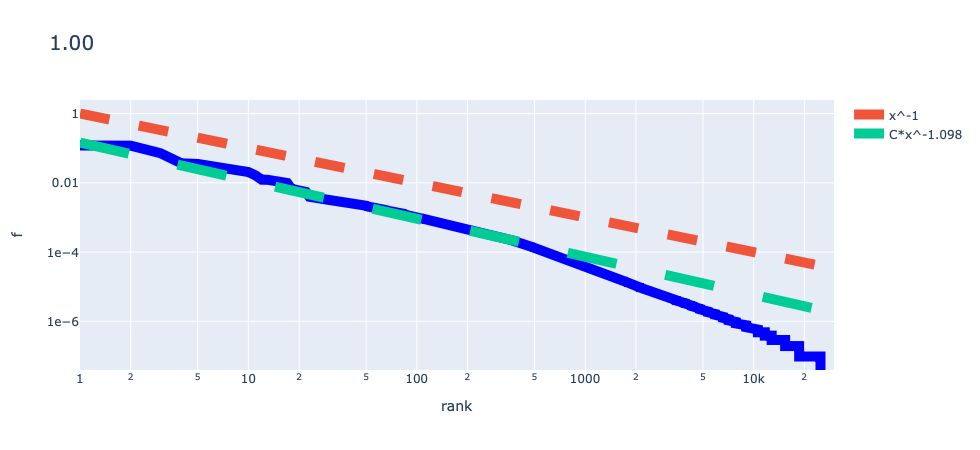

In [18]:
layer_of_interest = runtime[moi_index].layers[-1]
cnts = layer_of_interest.sorted_nodes
cnts = np.abs(cnts)
cnts = cnts[cnts<1e15]
cnts = cnts/cnts.sum()
cnts = np.sort(cnts)[::-1]

x = np.linspace(1, len(cnts), len(cnts))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=cnts, marker=dict(symbol="0", size=20, color="blue"), line_width=10, name="", showlegend=False))
fig.add_trace(go.Scatter(x=x, y=1/x, line_width=10, line_dash="dash",name="x^-1"))

fit_func = lambda x, C, gamma: C * np.power(x, - gamma)

popt, pcov = curve_fit(fit_func, x[20:15000], cnts[20:15000])
fig.add_trace(go.Scatter(x=x, y=fit_func(x, *popt), line_width=10, line_dash="longdash", name=f"C*x^-{round(popt[1],3)}"))

#dd = np.diff(np.diff(cnts))
#mask = np.argwhere((dd[1:]*dd[:-1]<0)).ravel()
#fig.add_trace(go.Scatter(x=x[mask],y=cnts[mask],  name=f"flexes", mode="markers"))


fig.update_xaxes(type="log", title="rank")
fig.update_yaxes(type="log", exponentformat="e", title="f")
fig.update_layout(title=moi_index, titlefont_size=20)

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(25,5))
for i,ax in enumerate(axs):
    loi = layers[i]
    leaves = loi.nodes[:1000]
    avg_leaves = loi.average
    sns.heatmap(list(map(lambda leaf_A: list(map(lambda leaf_B: np.abs(leaf_A[1]-leaf_B[1])/avg_leaves if leaf_A[0] < leaf_B[0] else 0,enumerate(leaves))),enumerate(leaves))), ax=ax)

# Last Layer

In [ ]:
fig = go.Figure()
leaves = np.array(runtime[moi_index].layers[-1].nodes)
leaves = leaves[abs(leaves) < 1e15]
fig.add_trace(go.Histogram(x=leaves, nbinsx=100))

layout=dict(
xaxis=dict(title="leaves", title_font_size=35, tickfont_size=25),
yaxis=dict(tickfont_size=25)
)

fig.update_layout(layout)

## Histogram of distances

In [10]:
import multiprocessing as mp
import gc
def append_error(err):
    print(err)
        
def append_dist(d):
    global distances
    distances.append(d)
    
def measure_func(leaf_A):
    return list(map(lambda leaf_B: abs(leaf_A[1]-leaf_B[1]) if leaf_A[0] < leaf_B[0] else np.nan, enumerate(leaves)))

In [11]:
data = dict()
for model in runtime:
    loi = model.layers[-1]
    N = 500
    if len(loi)>N:
        leaves = np.random.choice(loi.nodes,size=N,replace=False)
    else:
        leaves = loi.nodes
    norm_leaves = max(loi.nodes)
    #print(norm_leaves)

    distances = []
    pool = mp.Pool(4) 
    res = pool.map_async(measure_func, enumerate(leaves), callback=append_dist, error_callback=append_error)
    pool.close()
    pool.join()
    distances = np.ravel(distances)
    #distances = np.ravel(list(map(lambda leaf: abs((leaf-avg_leaves)/norm_leave),enumerate(leaves))))
    #distances=distances/max([np.nanmax(distances),abs(np.nanmin(distances))])
    distances = distances[~np.isnan(distances)]
    #distances = distances[distances>=0]

    data[model.name]=distances
    loi = None
    gc.collect()

In [ ]:
#import pickle
#with open("data_distances.pkl","wb") as file:
#    pickle.dump(data, file)
#with open("data_distances.pkl","rb") as file:
#    data = pickle.load(file)

### distance vs param

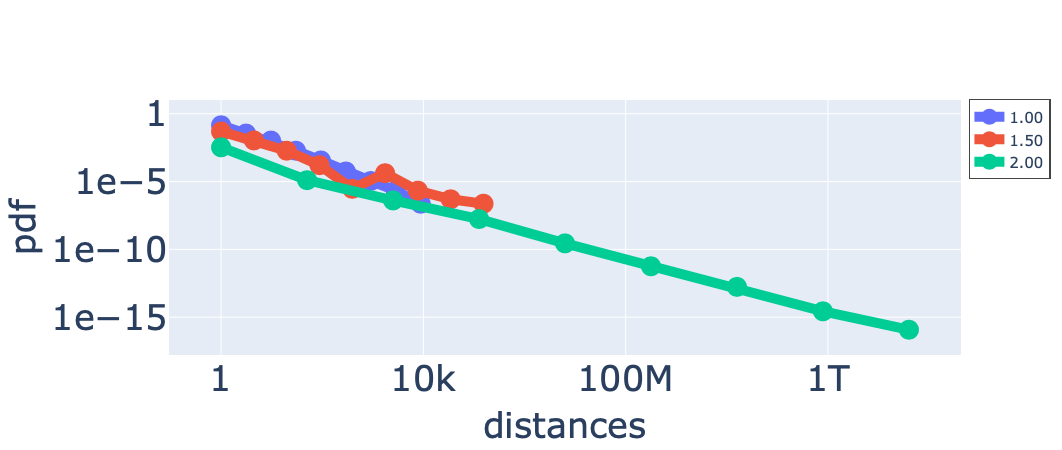

In [12]:
scale_distances = False

fig = go.Figure()

n_leaves = len(leaves)
for param,distances in data.items():
    try:
        if scale_distances:
            distances=distances/max([np.quantile(distances, 0.99),abs(np.nanmin(distances))])
            bins=np.linspace(0,np.quantile(distances, 0.99),15)
        else:
            bins=np.logspace(np.log10(distances[distances>1e-10].min()),np.log10(distances.max()), 10)
        bins, edges = np.histogram(distances, bins=bins, density=True)
        esges = (edges[1:]+edges[:1])/2
        fig.add_trace(go.Scatter(x=edges,y=bins,  marker=dict(size=20), line=dict(width=10), name=param))
    except:
        pass
    
fig.update_layout(xaxis=dict(title="distances", titlefont_size=35, tickfont_size=35, nticks= 5),
                 yaxis=dict(title="pdf", titlefont_size=35,tickfont_size=35, type="log", exponentformat="e", showexponent='all', nticks=4),
                 legend=dict(x=1.01,y=1,borderwidth=0.5,font_size=15,orientation="v"))

if not scale_distances:
    fig.update_xaxes(type="log")
fig.show()
filename = "images/pdf_distances_nbinom_scaling"
if scale_distances:
    filename+="_scaled"
fig.write_image(f"{filename}.pdf")
fig.write_html(f"{filename}.html")

### Distance vs layer

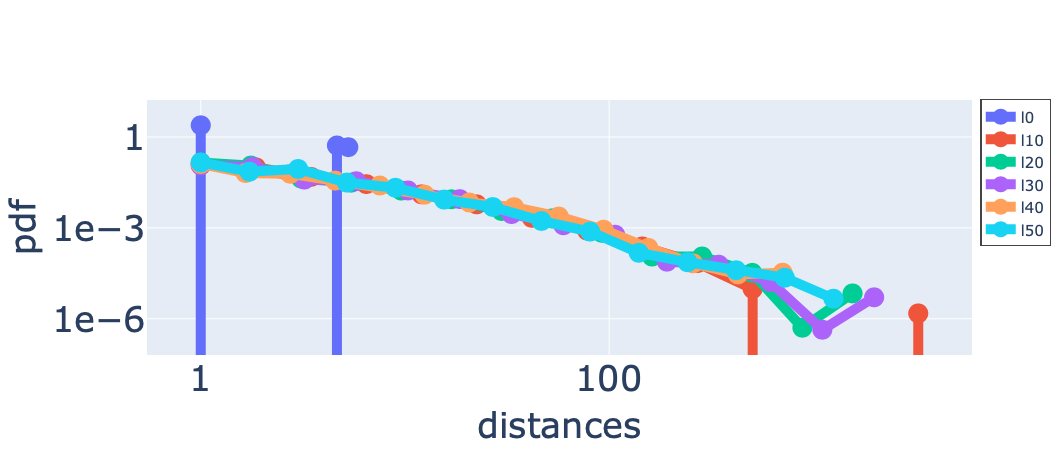

In [12]:
fig = go.Figure()

for loi in runtime[-1].layers[::10]:
    N = 500
    if len(loi)>N:
        leaves = np.random.choice(loi.nodes,size=N,replace=False)
    else:
        leaves = loi.nodes
    avg_leaves = loi.median
    
    distances = []
    pool = mp.Pool(2) 
    res = pool.map_async(measure_func, enumerate(leaves), callback=append_dist, error_callback=append_error)
    pool.close()
    pool.join()
    distances = np.ravel(distances)
    distances = distances[~np.isnan(distances)]
    
    n_leaves = len(leaves)

    bins=np.logspace(np.log10(distances[distances>0].min()),np.log10(distances.max()), 15)
    #bins=np.linspace(distances.min(),distances.max(),20)
    bins, edges = np.histogram(distances, bins=bins, density=True)
    esges = (edges[1:]+edges[:1])/2
    fig.add_trace(go.Scatter(x=edges,y=bins,  marker=dict(size=20), line=dict(width=10), name=loi.__repr__().split(",")[0]))

    gc.collect()
    
fig.update_layout(xaxis=dict(title="distances", titlefont_size=35, tickfont_size=35, exponentformat="e", type="log", nticks= 4),
                 yaxis=dict(title="pdf", titlefont_size=35,tickfont_size=35, type="log", exponentformat="e", showexponent='all', nticks=4),
                 legend=dict(x=1.01,y=1,borderwidth=0.5,font_size=15,orientation="v"))

fig.show()
filename = "images/distance_pdf_layers_nbinom"
fig.write_image(f"{filename}.pdf")
fig.write_html(f"{filename}.html")

# Hyperparameters

## gamma

In [13]:
def get_exp(layer, x_limits = (0,-1))->float:
    try:
        layer_of_interest = layer
        cnts = layer_of_interest.sorted_nodes
        #cnts = np.abs(cnts)
        cnts = cnts[np.abs(cnts)<1e15]
        cnts = cnts/cnts.sum()
        cnts = np.sort(cnts)[::-1]
        x = np.linspace(1, len(cnts), len(cnts))

        popt, pcov = curve_fit(lambda x, C, gamma: C * np.power(x, - gamma), x[x_limits[0]:x_limits[1]], cnts[x_limits[0]:x_limits[1]])
        return popt[1]
    except:
        return np.nan

In [14]:
#exps = np.nanmean([list(map(get_exp, model.layers)) for model in runtime], axis=0)
#exps_errors = np.nanstd([list(map(get_exp, model.layers)) for model in runtime], axis=0)
exps = list(map(lambda m: get_exp(m.layers[-1]), runtime))
#exps = list(map(get_exp, runtime[moi_index].layers))

In [19]:
exps_first = list(map(lambda m: get_exp(m.layers[-1], x_limits=(0,50)), runtime))
exps_second = list(map(lambda m: get_exp(m.layers[-1], x_limits=(50,2000)), runtime))
exps_third = list(map(lambda m: get_exp(m.layers[-1], x_limits=(2000,10000)), runtime))

In [21]:
get_exp(runtime["2.00"].layers[-1], x_limits=(30,2000))

7.91041820514108

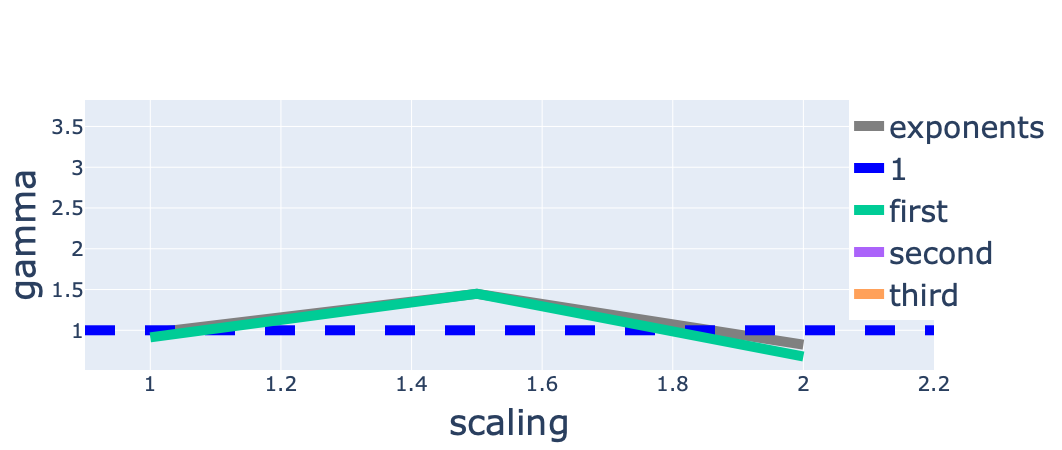

In [22]:
x, xlabel = params, "scaling"
#x, xlabel = np.linspace(1,len(exps),len(exps)), "Layer"

fig = go.Figure()

#fig.add_scatter(x = x, y=exps, error_y=dict(type="data", array=exps_errors, visible=True, width=8, thickness=3), name="exponents", mode="lines", marker=dict(size=10), line=dict(width=10, color="gray"))
fig.add_scatter(x = x, y=exps, name="exponents", mode="lines", marker=dict(size=10), line=dict(width=10, color="gray"))
fig.add_trace(go.Scatter(y=[1,1], x=[min(x)*0.9,max(x)*1.1], name="1", mode="lines", line=dict(width=10, color="blue", dash="dash")))

for exp, name in zip([exps_first, exps_second, exps_third],["first", "second", "third"]):
    fig.add_scatter(x = x, y=exp, name=name, mode="lines", marker=dict(size=10), line=dict(width=10))



fig.update_traces(marker_size=20)
fig.update_layout(xaxis=dict(title=xlabel, exponentformat = 'e', tickfont=dict(size=20), title_font_size=35),
                  yaxis_title="gamma",
                  yaxis=dict(tickfont=dict(size=20), title_font=dict(size=35)),
                 legend=dict(font_size=30, orientation="v", x=0.9, y=1))
fig.show()
filename = "images/exp_scaling_unif_regimes"
fig.write_image("{}.pdf".format(filename))
fig.write_html("{}.html".format(filename))

## nl

In [11]:
exps = list(map(lambda m: get_exp(m.layers[-1]), runtime))

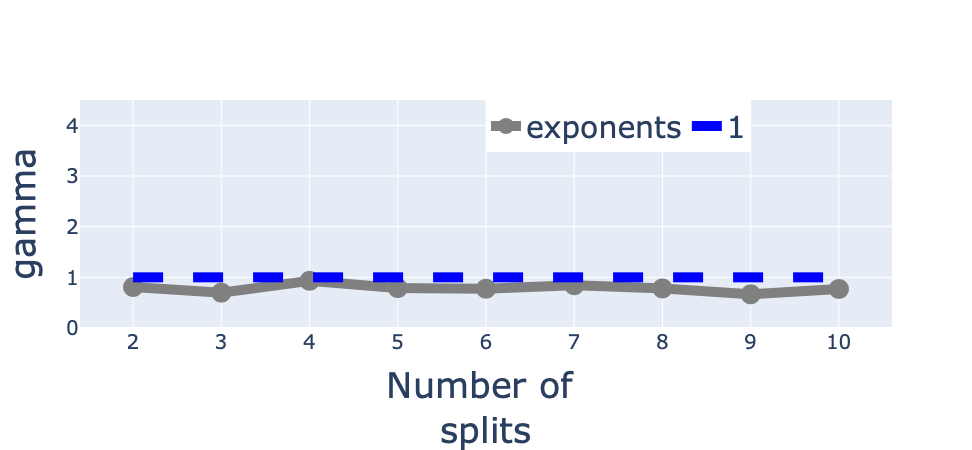

In [20]:
fig = go.Figure()

fig.add_scatter(x = params, y=exps, name="exponents", mode="lines+markers", marker=dict(size=10), line=dict(width=10, color="gray"))
fig.add_trace(go.Scatter(y=[1,1], x=[2,len(params)+1], name="1", mode="lines", line=dict(width=10, color="blue", dash="dash")))


fig.update_traces(marker_size=20)
fig.update_layout(xaxis=dict(title="Number of <br> splits", exponentformat = 'e', tickfont=dict(size=20), title_font_size=35),
                  yaxis_title="gamma",
                  yaxis=dict(range=(0,4.5),tickfont=dict(size=20), title_font=dict(size=35)),
                  legend=dict(font_size=30, orientation="h", x=0.5, y=1))
fig.show()
filename="images/exp_nl_nbinom"
fig.write_image(f"{filename}.pdf")
fig.write_html(f"{filename}.html")

## Heaps

In [ ]:
h = [len(np.unique(m.layers[-1].nodes)) for m in runtime]
M = np.array([np.sum(m.layers[-1].nodes) for m in runtime])

In [ ]:
x = np.linspace(min(M), max(M), 10)

fig = make_subplots(cols=2, rows=1)

popt,pcov = curve_fit(lambda x, C, gamma: C*np.power(x,gamma), M, h)

fig.add_scatter(x=M,y=h, mode="markers", marker=dict(size=20, color="gray"), showlegend=False, row=1, col=1)

popt, pcov = curve_fit(lambda x, C, exp: C*np.power(x,exp), M, h)
fig.add_scatter(x=M,y=popt[0]*np.power(M,popt[1]), mode="lines", line=dict(width=10, color="red", dash="dot"), name="teo exp={:.2f}".format(popt[1]), row=1, col=1)


bins = np.logspace(np.log10(M.min()),np.log10(M.max()),15)
means, edges, _ = binned_statistic(M,h, statistic="mean", bins=bins)
var, edges, _ = binned_statistic(M,h, statistic="std", bins=bins)
var = var*var
cnt, edges, _ = binned_statistic(M,h, statistic="count", bins=bins)

mask = cnt > 10

fig.add_scatter(x=(edges[1:]+edges[:-1])[mask]/2, y=means[mask], mode="markers+lines", line=dict(width=10, color="blue", dash="dot"), marker=dict(size=15), name="binned avg", row=1, col=1)


fig.update_xaxes(type="log", 
                 title="M",
                 title_font_size=30, 
                 tickfont_size=25, 
                 exponentformat="e", 
                 showexponent="all", 
                 tickangle=300,
                 row=1, col=1)
                 
fig.update_yaxes(type="log",
                 title="h",
                 title_font_size=30, 
                 tickfont_size=25, 
                 nticks=5,
                 row=1, col=1)

x = np.linspace(min(means), max(means), 10)
fig.add_trace(go.Scatter(x=means[mask],y=var[mask], mode="markers", marker = dict(size=20),showlegend=False), row=1, col=2)
fig.add_traces([
    go.Scatter(x=x, y=x, name="Poisson", mode="lines", line=dict(width=10, dash="dashdot")),
    go.Scatter(x=x, y=x**2, name="Taylor", mode="lines", line=dict(width=10, dash="longdashdot"))
],rows=1, cols=2)

fig.update_xaxes(type="log", 
                 title="<h>",
                 title_font_size=30, 
                 tickfont_size=25, 
                 exponentformat="e", 
                 showexponent="all", 
                 tickangle=300,
                 row=1, col=2)
                 
fig.update_yaxes(type="log",
                 title="var<h>",
                 title_font_size=30, 
                 tickfont_size=25, 
                 nticks=2,
                 row=1, col=2)

fig.update_layout(legend=dict(font_size=20, orientation="h", x=0.1,y=1.2),width=1500, height=800)
fig.show()
fig.write_image("images/heaps.pdf")
fig.write_html("images/heaps.html")

In [ ]:
import gc
gc.collect()